 # House Price Prediction

## Introduction :-

Buying a home, especially in a city like Bengaluru, is a tricky choice. While the major factors are usually the same for all metros, there are others to be considered for the Silicon Valley of India. With its help millennial crowd, vibrant culture, great climate and a slew of job opportunities, it is difficult to ascertain the price of a house in Bengaluru.

Creating a Machine Learning model to predict the home prices in Bangalore, India. We are going to use the dataset from Kaggle.com.



Below data science concepts are used in this project
* Data loading and cleaning
* Outlier detection and removal
* Feature engineering
* Dimensionality reduction
* Gridsearchcv for hyperparameter tunning
* K fold cross validation

Technology and tools used in this project
* Python
* Numpy and Pandas for data cleaning
* Matplotlib for data visualization
* Sklearn for model building
* Google Colaboratory Notebook
* Python flask for http server
* HTML/CSS/Javascript for UI

## Steps
1. We will first build a model using sklearn and linear regression using banglore home prices dataset from kaggle.com.
2. Second step would be to write a python flask server that uses the saved model to serve http requests.
3. Third component is the website built in html, css and javascript that allows user to enter home square ft area, bedrooms etc and it will call python flask server to retrieve the predicted price. 


## Dataset Reference
* [Bengaluru House price data](https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data)

* I have also uploaed the csv file in this repository [Bengaluru_House_Data.csv](Bengaluru_House_Data.csv)

## Step 1: Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns

## Step 2: Load the data


In [2]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Step 3-  Exploratory Data Analysis
* Finalize the columns to work with and drop the rest of them

In [3]:
# Get the no of rows and columns
df1.shape

(13320, 9)

In [4]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.6+ KB


In [6]:
#Get all the column names
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
#Lets check the unique values 'area_type' column
df1.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [8]:
#Let get the count of trianing examples for each area type
df1.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [9]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df1['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [11]:
df1['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

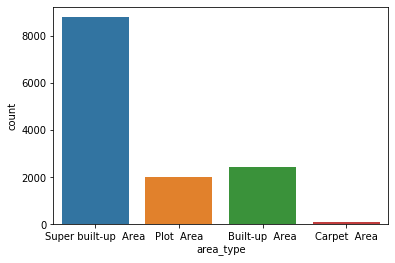

In [12]:
sns.countplot(df1['area_type'])

## Dropping the columns
* As such all the columns are important for price prediction, but for the sake of this project I am going to drop few columns

In [13]:
# Note everytime we make change in dataset we store it in new dataframe
df2 = df1.drop(['area_type', 'availability', 'society', 'balcony'],axis='columns')

print('Rows and columns are = ', df2.shape)
df2.head()

Rows and columns are =  (13320, 5)


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Step 4: Data Cleaning
* Check for na values
* Verify unique values of each column
* Make sure values are correct (eg. 23 BHK home with only 2000 Sqrft size seems wrong)

## Handling null values

In [14]:
# Get the sum of all na values from dataset
df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

Since null values as comapre to total training examples(13320) is verry less we can safly drop those examples

In [15]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [16]:
# Since all oor training examples containing null values are dropped lets check the shape of the dataset again
df3.shape

(13246, 5)

## Feature Engineering
* 'size' column contgaines the size of house in terms of BHK( Bedroom Hall Kitchen)
* To simply it we can create new column by the name 'bhk' and add only numeric value of how many BHK's

In [17]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [18]:
df4 = df3.copy()

# Using lambda function we can get the BHK numeric value
df4['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
#df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df4.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

From above data we can see that there are home with upto 43 BHK's in Bangalore.. must be apolitician :)

In [19]:
#Get the training examples with home size more than 20 BHK
df4[df4.bhk >20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


Note above 43 BHK home area is only 2400 sqrft only. We will remove this data error later. First lets clean the 'total_sqft' column

Now lets check the unique values in 'total_sqft' column

In [20]:
df4.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Note above, there are few records with range of the area like '1133 - 1384'.
Lets write a function to identify such values

In [21]:
def is_float(x):
  try:
    float(x)
  except:
    return False

  return True

In [22]:
# Test the function
print('is this (123) float value = %s' % (is_float(123)))
print('is this (1133 - 1384) float value = %s' % (is_float('1133 - 1384')))

is this (123) float value = True
is this (1133 - 1384) float value = False


In [23]:
#Lets apply this function to 'total_sqft' column

#Showing training examples where 'total_sqft' vale is not float
df4[~df4['total_sqft'].apply(is_float)].head(10) 

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


* Since most the value are range of sqft, we can write afunction to get the average value from a range. 
* There are few values like '34.46Sq. Meter' and '4125Perch' we can also try and convert those values into sqft but for now I amgoing to ignore them

In [24]:
# converting range like values in string to numeric values
# range value is converted to mean value

# values with different units (eg: "50 sq meters") converted to none so that
# later it is removed from the dataframe

def convert_range_to_sqft(x):
  try:
    tokens = x.split('-')

    if len(tokens) == 2:
      return (float(tokens[0]) + float(tokens[1]))/2
    else:
      return float(x)
  except:
    return None

In [25]:
#Lets test the convert_range_to_sqft()
print('Return value for i/p 12345 = %s' % (convert_range_to_sqft('12345')))
print('Return value for i/p 1133 - 1384 = %s' % (convert_range_to_sqft('1133 - 1384')))
print('Return value for i/p 34.46Sq. Meter = %s' % (convert_range_to_sqft('34.46Sq. Meter')))

Return value for i/p 12345 = 12345.0
Return value for i/p 1133 - 1384 = 1258.5
Return value for i/p 34.46Sq. Meter = None


In [26]:
# Lets apply this function for total_sqft column
df5 = df4.copy()

df5.total_sqft = df4.total_sqft.apply(convert_range_to_sqft)
df5.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [27]:
# Since our converion function will return null for values like 34.46Sq. Meter. Lets check for any null values in it
df5.total_sqft.isnull().sum()

46

In [28]:
# Lets dro the null training sets from total_sqft
df6 = df5.dropna()
df6.total_sqft.isnull().sum()

# OR
#We can also select the not null training set using below filter
#df6 = df5[df5.total_sqft.notnull()]

0

In [29]:
# Lets cross check the values of 'total_sqft'
print('total_sqft value for 30th training set in df4 = %s' % (df4.total_sqft[30]))
print('total_sqft value for 30th training set in df6 = %s' % (df6.total_sqft[30]))

total_sqft value for 30th training set in df4 = 2100 - 2850
total_sqft value for 30th training set in df6 = 2475.0


## Feature Engineering

let's deal with price column which is the target varaible in this regression project

* 'price' column containes the price of house in lacka ( 1 lakh = 100000)
* Price per square fit is important parameter in house prices.
* So we can create new column by the name 'price_per_sqft' and add price per sqft in it. formula = (price * 100000)/total_sqft

In [30]:
df7 = df6.copy()

df7['price_per_sqft'] = (df6['price'] * 100000)/df6['total_sqft']
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [31]:
df7_stats = df7['price_per_sqft'].describe()
df7_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

## Dimesionality Reduction
* Dimensionality reduction is simply a process of reducing the dimension( or number of random variables) of your feature set
* In our dataset 'location' is categorical variable with 1287 categories.
* Before using One Hot Encoding to create dummy variables we must reduce the number of categories by using dimensionality reduction so that we will get less number of dummy variables.
* Our criteria for dimesionality reduction for 'location' is to use 'other' location for any location having less than 10 data points.


In [32]:
#Trim the location values
df7.location = df7.location.apply(lambda x: x.strip())
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [33]:
#Lets get the count of each location
location_stats = df7.location.value_counts(ascending=False)
location_stats

Whitefield                                  533
Sarjapur  Road                              392
Electronic City                             304
Kanakpura Road                              264
Thanisandra                                 235
Yelahanka                                   210
Uttarahalli                                 186
Hebbal                                      176
Marathahalli                                175
Raja Rajeshwari Nagar                       171
Bannerghatta Road                           151
Hennur Road                                 150
7th Phase JP Nagar                          148
Haralur Road                                141
Electronic City Phase II                    131
Rajaji Nagar                                106
Chandapura                                   98
Bellandur                                    96
KR Puram                                     88
Hoodi                                        88
Electronics City Phase 1                

In [34]:
#Total number unique location categories are
len(location_stats)

1287

We are going assign a category 'other' for every location where total datapoints are less than 10

In [35]:
#Get total number of categories where data points are less than 10
print('Total no of locations where data points are more than 10 = %s' % (len(location_stats[location_stats > 10])))
print('Total no of locations where data points are less than 10 = %s' % (len(location_stats[location_stats <= 10])))

Total no of locations where data points are more than 10 = 240
Total no of locations where data points are less than 10 = 1047


Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [36]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

Sector 1 HSR Layout                         10
1st Block Koramangala                       10
Nagappa Reddy Layout                        10
BTM 1st Stage                               10
Kalkere                                     10
Naganathapura                               10
Nagadevanahalli                             10
Dairy Circle                                10
Dodsworth Layout                            10
Sadashiva Nagar                             10
Basapura                                    10
Ganga Nagar                                 10
Thyagaraja Nagar                            10
Gunjur Palya                                10
Chandra Layout                               9
Ejipura                                      9
Lingarajapuram                               9
Vishwanatha Nagenahalli                      9
Kaverappa Layout                             9
4th Block Koramangala                        9
B Narayanapura                               9
2nd Phase JP 

In [37]:
#Using lambda function assign the 'other' type to every element in 'location_stats_less_than_10'
df8 = df7.copy()

df8.location = df7.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x )
len(df8.location.unique())

241

Since 1047 location with less than 10 data points are converted to one category 'other'
Total no of unique location categories are = 240 +1  = 241

In [38]:
df8.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804



### Standard Deviation
* Standard deviation is measure of spread that is to khow how much does the data vary from the average
* A low standard deviation tells us that the data is closely clustered around the mean (or average), while a high standard deviation indicates that the data is dispersed over a wider range of values. 
* It is used when the distribution of data is approximately normal, resembling a bell curve.
* One standard deviation(1 Sigma) of the mean will cover 68% of the data. i.e. Data between (mean - std deviation) & (mean + std deviation) is 1 Sigma and which is equal to 68%
* Here we are going to consider 1 Sigma as our threshold adn any data outside 1 Sigma will be considered as outlier

* [How to Use Statistics to Identify Outliers in Data](https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)
* [Reference](https://youtu.be/MRqtXL2WX2M)



## Outlier Removal
* An outlier is an observation that is unlike the other observations. It is rare, or distinct, or does not fit in some way.
* Outliers are the data points that represent the extreame variation of dataset
* Outliers can be valid data points but since our model is generalization of the data, outliers can affect the performanace of the model. We are going to remove the otliers, but please note its not always a good practice to remove the outliers.
* To remove the outliers we can use domain knwoledge and standard deviation


### Using domain knowledge for outlier removal
* Normally square fit per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft)
* If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. 
* We will remove such outliers by keeping our minimum threshold per bhk to be 300 sqft

### Using domain knowledge for outlier removal


In [39]:
# Lets visualize the data where square fit per bedroom is less than 300
df8[(df8.total_sqft / df8.bhk) < 300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.00,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.00,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.00,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.00,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.00,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.00,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,23.00,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.00,7,12105.263158
149,other,6 Bedroom,1034.0,5.0,185.00,6,17891.682785


Note abobe we have 744 training examples where square fit per bedroom is less than 300. These are outliers, so we can remove them

In [40]:
#Lets check current dataset shape before removing outliers
df8.shape

(13200, 7)

In [41]:
df9 = df8[~((df8.total_sqft / df8.bhk) < 300)]
df9.shape

(12456, 7)

### Outlier Removal - Using Standard Deviation and Mean
* One standard deviation(1 Sigma) of the mean will cover 68% of the data. i.
e. Data between (mean - std deviation) & (mean + std deviation) is 1 Sigma and which is equal to 68%
* Here any datapin t outside the 1 Sigma deviation (68%) is outlier for us

In [42]:
# Get basic stats of column 'price_per_sqft'
df9.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Note: Its important to understand that price of every house is location specific. We are going to remove outliers using 'price_per_sqft' for each location

Text(0, 0.5, 'Count')

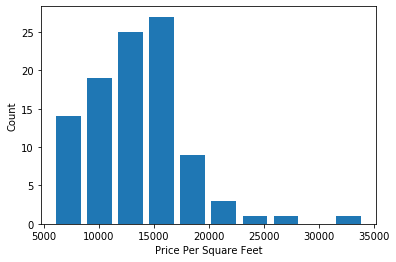

In [43]:
# Data visualization for 'price_per_sqft' for location 'Rajaji Nagar'
# Note here its normal distribuation of data so outlier removal using stad deviation and mean works perfectly here
plt.hist(df9[df9.location == "Rajaji Nagar"].price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [44]:
#Lets check current dataset shape before removing outliers
df9.shape

(12456, 7)

In [45]:
# data points lies between one sd is retained remaining are removed within each city


# Function to remove outliers using pps(price per sqft)
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(mean-std)) & (subdf.price_per_sqft<=(mean + std))] # 1 Sigma value i.e 68% of data
        df_out = pd.concat([df_out,reduced_df],ignore_index=True) # Storing data in 'df_out' dataframe
    return df_out

df10 = remove_pps_outliers(df9)
df10.shape

(10242, 7)

Text(0, 0.5, 'Count')

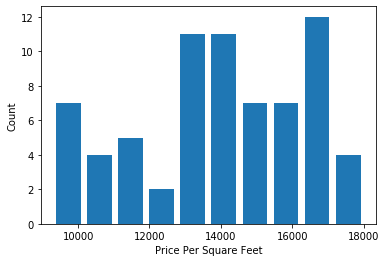

In [46]:
# Data visualization for 'price_per_sqft' for location 'Rajaji Nagar' after outlier removal
plt.hist(df10[df10.location == "Rajaji Nagar"].price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

### Using domain knowledge for outlier removal
* If location and square foot area is aslo same then price of 3BHK should be more than 2 BHK
* There are other factors that also affect the price but for this exercise we are treating such values as outlier and remove them

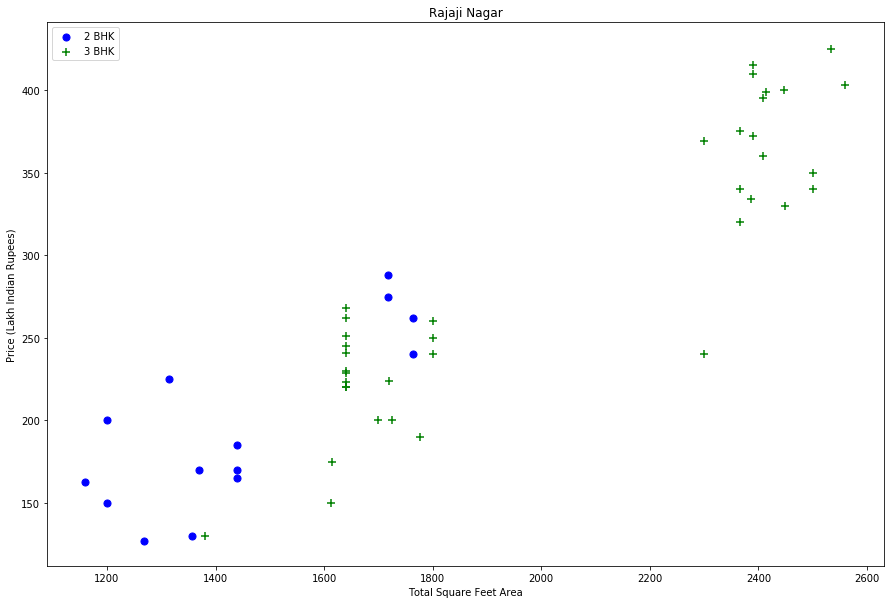

In [47]:
# Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df10,"Rajaji Nagar")

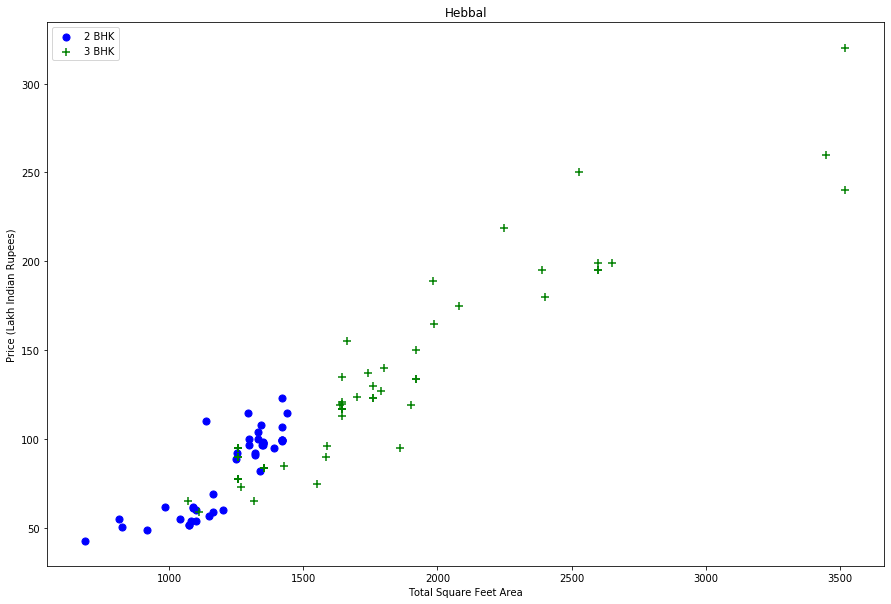

In [48]:
plot_scatter_chart(df10,"Hebbal")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary by name 'bhk_stats' with below values of 'price_per_sqft'

```
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
```
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [49]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df11 = remove_bhk_outliers(df10)
df11.shape

(7317, 7)

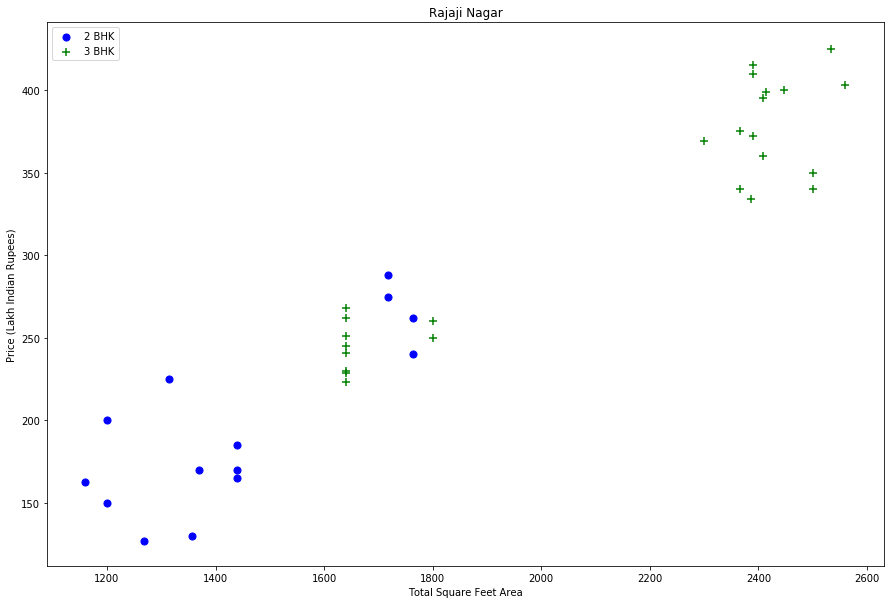

In [50]:
#Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties
plot_scatter_chart(df11,"Rajaji Nagar")

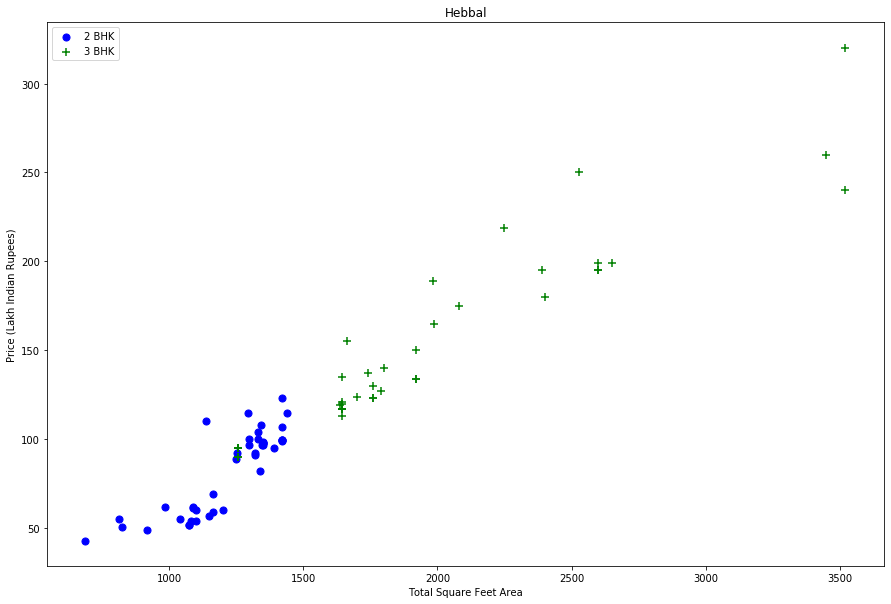

In [51]:
plot_scatter_chart(df11,"Hebbal")

Now you can campre the scatter plots for location(Hebbal and Rajaji Nagar) for before and after outlier removal

Text(0, 0.5, 'Count')

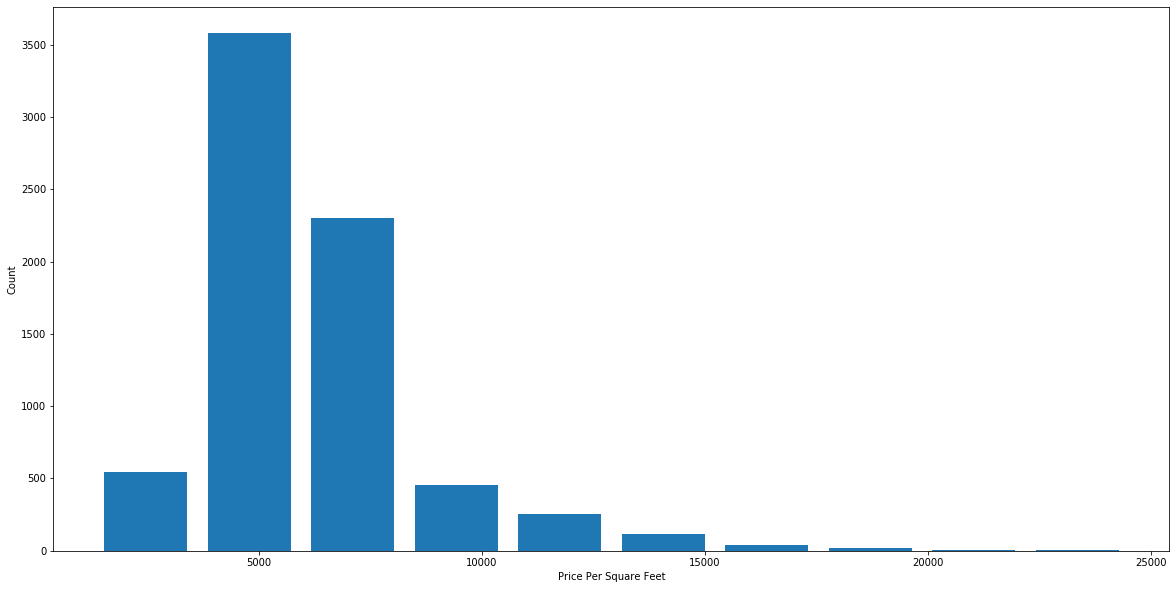

In [52]:
#Now lets plot the histogram and visualize the price_per_sqft data after outlier removal

matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df11.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

### Using domain knowledge for outlier removal
* Generally number of bathrooms per BHK are (no of BHK) + 2.
* So using above understanding we can identify the outliers and remove them

In [53]:
#Get unique bath from dataset
df11.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [54]:
#Get the training examples where no of bath are more than (no of BHK +2)
df11[df11.bath > df11.bhk + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


We can remove above outliers from the datset

In [55]:
#Lets check current dataset shape before removing outliers
df11.shape

(7317, 7)

In [56]:
# Remove the outliers with more than (no of BHK + 2) bathrooms
df12 = df11[df11.bath < (df11.bhk + 2)]
df12.shape

(7239, 7)

This concludes our data cleaning, lets drop unnecessary columns
* Since we have 'bhk' feature lets drop 'size'
* We have crerated 'price_per_sqft' for outlier detection and removal purpose, so we can also drop it. 

In [57]:
df13 = df11.drop(['size', 'price_per_sqft'], axis='columns')
df13.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


## One Hot Encoding



- Categorical data are variables that contain label values rather than numeric values.

- The number of possible values is often limited to a fixed set.

- Since we have 'location' as categorical feature lets use One Hot Encoding to create separate column for each location category and assign binary value 1 or 0

- Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

- A one hot encoding is a representation of categorical variables as binary vectors. This first requires that the categorical values be mapped to integer values. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1

In [58]:
dummies = pd.get_dummies(df13.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
#To avoid dummy variable trap problem lets delete the one of the dummy variable column
dummies = dummies.drop(['other'],axis='columns')
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
#Now lets add dummies dataframe to original dataframe
df14 = pd.concat([df13,dummies],axis='columns')
df14.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
#Lets delete the location feature
df15 = df14.drop(['location'],axis='columns')
df15.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 5: Build Machine Learning Model


In [62]:
#Final shape of our dataset is
df15.shape

(7317, 244)

Now leats create X(independent variable/features) and y(dependent variables/target)

In [63]:
X = df15.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
y = df15.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

### Split the dataset to training andtest dataset

In [65]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
print('X_train shape = ',X_train.shape)
print('X_test shape = ',X_test.shape)
print('y_train shape = ',y_train.shape)
print('y_test shape = ',y_test.shape)

X_train shape =  (5853, 243)
X_test shape =  (1464, 243)
y_train shape =  (5853,)
y_test shape =  (1464,)


## Linear Regression
* Lets test the score with LinearRegression model

In [66]:
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8175889965469089

### Use K Fold cross validation to measure accuracy of our LinearRegression model
* Using Sklearn cross_val_score function
* Note: Sklearn's cross_val_score uses StratifiedKFold by default

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

# ShuffleSplit is used to randomize the each fold
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.83458131, 0.8720703 , 0.77477801, 0.86043362, 0.87857309])

## GridSearchCV
* From above scores its clear that with LinearRegresion we get max score of upto 87%
* Let use GridSearchCV to test other regression algorithm 

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet

def find_best_model_using_gridsearchcv(X,y):
  algos ={
      'linear_regression':{
          'model':LinearRegression(),
          'params': {
              'normalize':[True,False]
          }
      },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
  }

  scores= []
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

  for algo_name, config in algos.items():
      gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
      gs.fit(X,y)
      scores.append({
          'model': algo_name,
          'best_score': gs.best_score_,
          'best_params': gs.best_params_
      })

  return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.844087,{'normalize': False}
1,lasso,0.710569,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.666432,"{'criterion': 'mse', 'splitter': 'random'}"


**Based on above results we can say that LinearRegression gives the best score. Hence we will use that**.

## Step#6: Testing The model
* Since all our locations are now columns in form of dummy variabales, all other dummy variables value should be 0 except the one(dummy variable column for our location) we are predicting for
* This(np.where(X.columns==location)[0][0]) code will give us index of dummy column for our location
* Now we will assign value '1' to this index and keep all other dummy variable columns as '0'

In [69]:
def predict_price(location, sqft, bath, bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [70]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

83.16761667751658

In [71]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

83.71323640886466

In [72]:
predict_price('Indira Nagar',1000, 2, 2)

158.0740980111576

In [73]:
predict_price('Indira Nagar',1000, 3, 3)

158.61971774250569

In [74]:
predict_price('Chikka Tirupathi',2600,5, 4)

109.88307560141948

In [75]:
# location = input("Enter Your prefered location :")
# sqft = int(input("Enter your sqft :"))
# bath = int(input("Enter bath number :"))
# size = int(input("Enter your bhk size :"))

# predict_price(location, sqft, bath, size)